## <Center> K-Means Clustering: Wine Data <center>
##### This document features clustering a *wine data set* (see https://archive.ics.uci.edu/dataset/109/wine for the full data set description and download). 

##### This analysis looks at the 'Colour Intensity' and 'Flavinoids' variables in the data set and is a simple demonstration of how the K-Means method can be used to cluster data in real life. Each data point in the real data set is categorized into 3 separate clusters - '1', '2' or '3' - each corresponding to a different cultivar of grapes used in the wine-making process. 

##### We will first standardize the data, then divide the data points into 3 different clusters using the K-Means method. Finally, we will look at how this result compares visually to the way the data has been clustered in real life. 

##### **1. Import packages:**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

sns.set()

import warnings
warnings.filterwarnings('ignore')

##### **2. Read in data:**

In [2]:
raw_data = pd.read_csv('wine_data.csv', delimiter = ';')
raw_data.head()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavinoids,Nonflavinoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
print(raw_data.columns.get_loc('Flavinoids'),  ",", raw_data.columns.get_loc('Color Intensity'))

6 , 9


In [52]:
flavinoids = raw_data.iloc[:,6:7]
colour_intensity = raw_data.iloc[:,9:10]
data = pd.concat([flavinoids, colour_intensity], axis =1)
data.head()

,Flavinoids,Color Intensity
0,3.06,5.64
1,2.76,4.38
2,3.24,5.68
3,3.49,7.80
4,2.69,4.32


##### **3. Scatter plot of the unclustered data:**

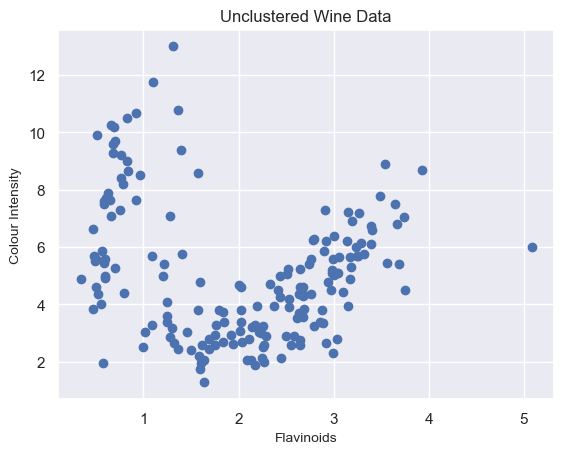

In [46]:
plt.scatter(data['Flavinoids'], data['Color Intensity'])
plt.xlabel('Flavinoids', size = 10)
plt.ylabel('Colour Intensity', size = 10)
plt.title('Unclustered Wine Data', size = 12);

##### **4. Scale Inputs:**

In [47]:
scaled_inputs = preprocessing.scale(data)

##### **5. The Elbow Method:** 
##### WCSS is the *Within-Cluster Sum of Squares*. The optimal number of clusters is the point at which adding another cluster does not cause a significant decrease in the WCSS. The decision on the number of clusters is made using the *Elbow Method*, for which the code and graph are shown below. The real data set is divided into 3 clusters (cultivars), so below we will use the K-Means method for 3 clusters. As seen in the *Elbow Method* graph below, 4 or 5 clusters could also be used in theory, but due to the nature of this data set, this would not make sense to choose more (or fewer) clusters. Furthermore, adding more than 5 clusters adds little to no value to this model, based on the observed decrease in WCSS.

In [48]:
wcss = []
for i in range (1,11):
    km = KMeans(i)
    km.fit(scaled_inputs)
    inertia = km.inertia_
    wcss.append(inertia)
wcss

[356.00000000000006,
 184.1799927931143,
 101.96423677156427,
 66.50060065900969,
 50.85756832965964,
 43.13882153763855,
 35.720030450576296,
 30.348625546971537,
 27.275351179622234,
 25.12441763579909]

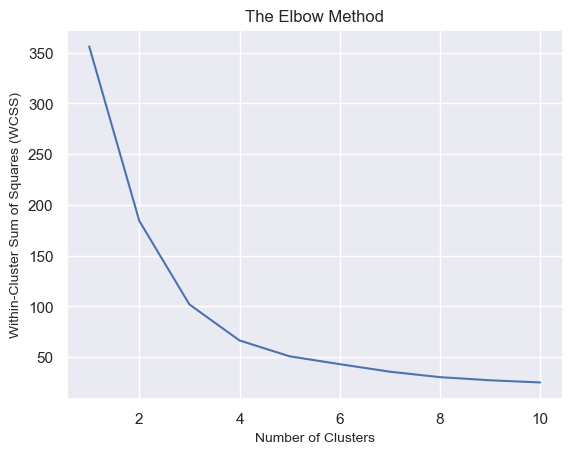

In [49]:
no_of_clusters = list(range(1,11))
plt.plot(no_of_clusters, wcss)
plt.xlabel('Number of Clusters', size = 10)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', size = 10)
plt.title('The Elbow Method', size = 12);

##### **6. K-Means Method:**

In [23]:
km_3 = KMeans(3)
km_3.fit(scaled_inputs)

KMeans(n_clusters=3)

In [24]:
clusters =data.copy()
clusters['cluster prediction'] = km_3.fit_predict(scaled_inputs)

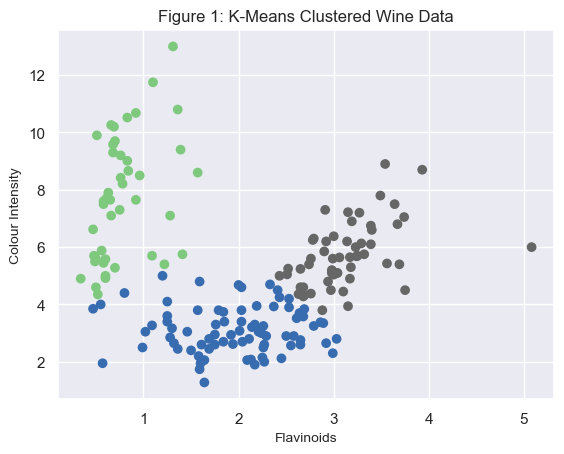

In [33]:
plt.scatter(data['Flavinoids'], data['Color Intensity'], c = clusters['cluster prediction'], cmap = 'Accent' )
plt.xlabel('Flavinoids', size = 10)
plt.ylabel('Colour Intensity', size = 10)
plt.title('Figure 1: K-Means Clustered Wine Data', size = 12);

##### We can see in *Figure 1* above that the K-Means method of clustering has separated the data into 3 distinct clusters. 

##### **7. Plotting the real data:**
##### The real data has each observation categorised as region 1, region 2, region 3: 

In [44]:
real_data = pd.read_csv('wine_data_with_cultivar.csv', delimiter = ';')
real_data.head()

,Cultivar,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavinoids,Nonflavinoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
print(real_data.columns.get_loc('Cultivar'), ',', real_data.columns.get_loc('Flavinoids'), ',', real_data.columns.get_loc('Color Intensity'))

0 , 7 , 10


In [51]:
cultivar = real_data.iloc[:, 0:1]
flavinoids = real_data.iloc[:, 7:8]
colour_intensity = real_data.iloc[:, 10:11]
data_2 = pd.concat([cultivar, flavinoids, colour_intensity], axis = 1)
data_2.head()  

,Cultivar,Flavinoids,Color Intensity
0,1,3.06,5.64
1,1,2.76,4.38
2,1,3.24,5.68
3,1,3.49,7.80
4,1,2.69,4.32


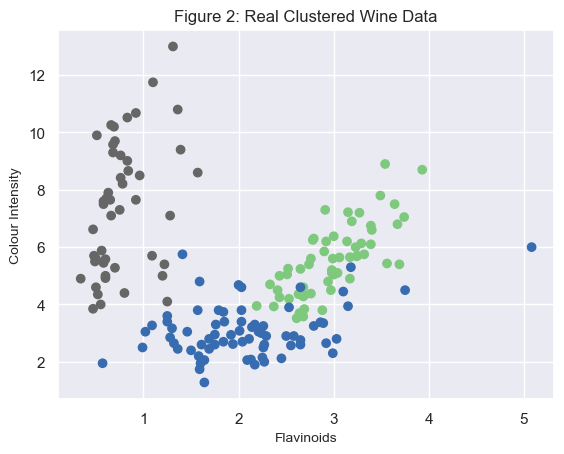

In [50]:
plt.scatter(data_2['Flavinoids'], data_2['Color Intensity'], c = data_2['Cultivar'], cmap= 'Accent')
plt.xlabel('Flavinoids', size = 10)
plt.ylabel('Colour Intensity', size = 10)
plt.title('Figure 2: Real Clustered Wine Data', size = 12);

##### As seen above, the predicted K-Means clusters from *Figure 1* closely align with the actual clusters in *Figure 2*.